# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

# Read and Understand Data

In [2]:
#Reading the csv file salary.csv
df = pd.read_csv('Salary Data.csv')
insured=df.copy()

In [3]:
# inspect data, print top 5
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#multivariate


In [4]:
#rename
insured.rename(columns = {'Years of Experience':'Years_of_Experience','Education Level':'Education_Level'}, inplace = True)

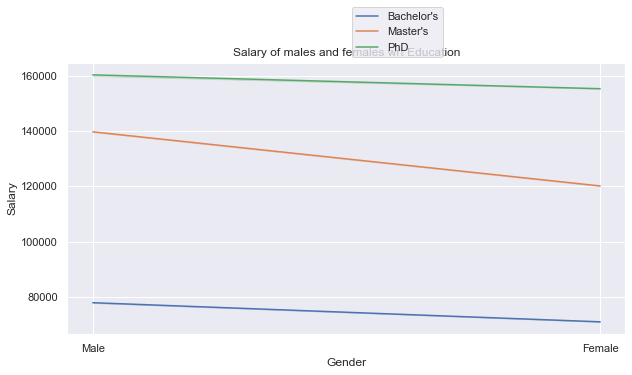

In [19]:
#lineplot
# ci=1: confidence interval, and it gives you an idea of how accurate the line is.
plt.figure(figsize=(10,5))
sns.lineplot(x = insured["Gender"], y =insured["Salary"],hue=insured["Education_Level"],ci=1).set(title= 'Salary of males and females wrt Education')
plt.legend(bbox_to_anchor=(0.5, 1))   # defines location of line graph legend (Bachelor, Master, PHD)
plt.show()

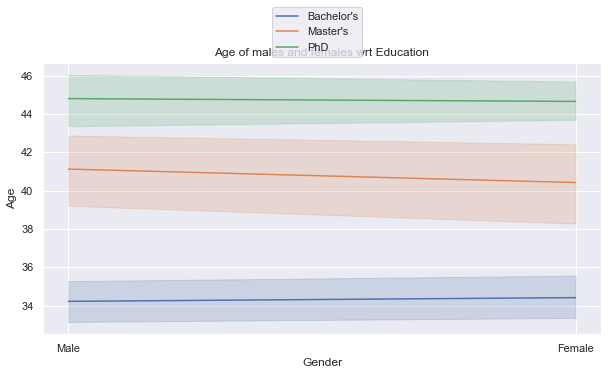

In [10]:
#multivariate
plt.figure(figsize=(10,5))
sns.lineplot(x = insured["Gender"], y =insured["Age"],hue=insured["Education_Level"]).set(title= 'Age of males and females wrt Education')
plt.legend(bbox_to_anchor=(0.4, 1))
plt.show()

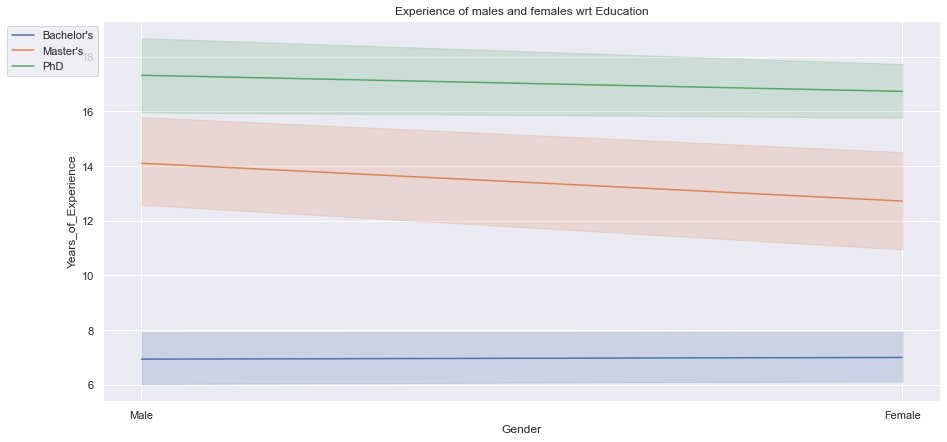

In [11]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Gender"], y =insured["Years_of_Experience"],hue=insured["Education_Level"]).set(title= 'Experience of males and females wrt Education')
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

#Cross tab

In [12]:
#Cross tab: for deep analysis
# This code puts Education_Level in row side, Gender in column side and calcualte average salary.

edu_gender_salary =pd.crosstab(index=insured['Education_Level'], columns=insured.Gender   , values = insured.Salary, aggfunc='mean')
edu_gender_salary


Gender,Female,Male
Education_Level,,
Bachelor's,71019.417476,77936.776860
Master's,120200.000000,139791.666667
PhD,155384.615385,160400.000000


In [13]:
gender_edu_salary=pd.crosstab(index=insured.Gender, columns=insured['Education_Level']  , values=insured.Salary,aggfunc='sum')
gender_edu_salary

Education_Level,Bachelor's,Master's,PhD
Gender,,,
Female,7315000.0,6010000.0,4040000.0
Male,9430350.0,6710000.0,4010000.0


In [ ]:
# plot directly from dataframe

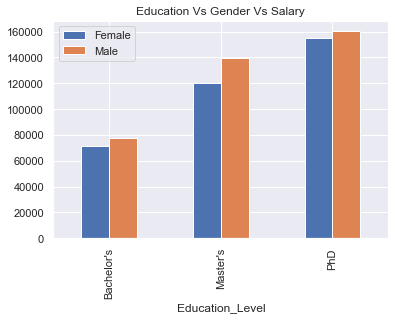

In [17]:
edu_gender_salary.plot(kind='bar',title="Education Vs Gender Vs Salary")
plt.legend(loc='upper left')  # it represents location of graph legend (Female,male)
plt.show()

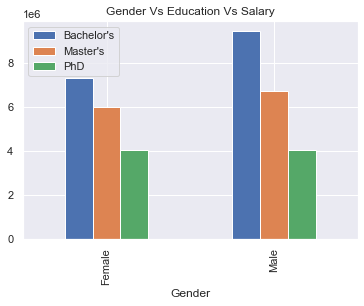

In [21]:
gender_edu_salary.plot(kind='bar',title="Gender Vs Education Vs Salary")
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Reading the csv file salary.csv
df = pd.read_csv('Salary Data.csv')
insured=df.copy()

In [22]:
# converting quantitative data to qualitative
insured

,Age,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [23]:
insured.describe()

,Age,Years_of_Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [24]:
#creating groups of age
category = pd.cut(insured.Age,bins=[20,25,30,35,40,45,50,55,60],
                  labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60'])
category

0      30-35
1      25-30
2      40-45
3      35-40
4      50-55
       ...  
370    30-35
371    40-45
372    25-30
373    30-35
374    40-45
Name: Age, Length: 375, dtype: category
Categories (8, object): ['20-25' < '25-30' < '30-35' < '35-40' < '40-45' < '45-50' < '50-55' < '55-60']

In [25]:
insured.insert(1,'AgeGroup',category)

In [26]:
insured

,Age,AgeGroup,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...,...
370,35.0,30-35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,40-45,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,25-30,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,30-35,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
category1=pd.cut(insured['Years of Experience'],bins=[0,5,10,15,20],labels=['0-5','5-10','10-15','15-20'])
insured.insert(6,'Exp_group',category1)


In [ ]:
insured.head()

,Age,AgeGroup,Gender,Education Level,Job Title,Years of Experience,Exp_group,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,0-5,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,0-5,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,10-15,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,5-10,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,15-20,200000.0


In [ ]:
exp_group = insured.groupby(insured.Exp_group).Salary.mean()
exp_group

,Salary
Exp_group,
0-5,49367.372881
5-10,92578.947368
10-15,118230.769231
15-20,159140.625000


<Axes: title={'center': 'Agebins vs Avg Salary'}, xlabel='Exp_group'>

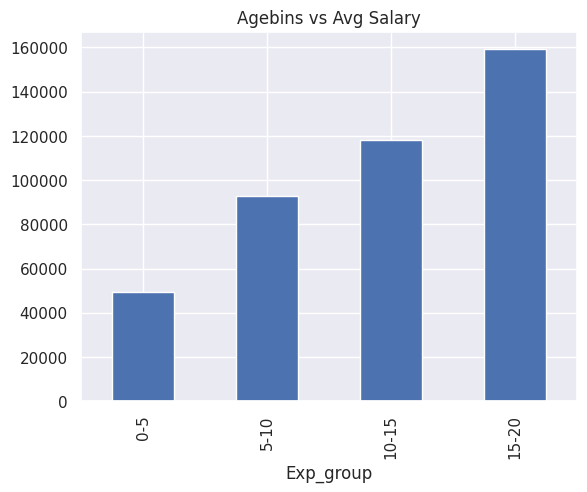

In [ ]:
exp_group.plot(kind='bar',title="Agebins vs Avg Salary")


In [ ]:
category2=pd.cut(insured['Age'],bins=[0,10,20,30,40,50,60,70],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70'])
insured.insert(6,'Age_group',category2)


In [ ]:
Age_bin_cat = insured.groupby(insured.Age_group).Salary.mean()
Age_bin_cat

,Salary
Age_group,
0-10,NaN
10-20,NaN
20-30,42676.027397
30-40,84166.666667
40-50,151260.162602
50-60,183888.888889
60-70,NaN


In [ ]:
# category3=pd.cut(insured['Years of Experience'],bins=[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20-25'])
# insured.insert(6,'Exp_group',category3)
# Exp_bin_cat = insured.groupby(insured.category3).Salary.mean()
# Exp_bin_cat

<Axes: title={'center': 'Age_bins vs Avg Salary'}, xlabel='Age_group'>

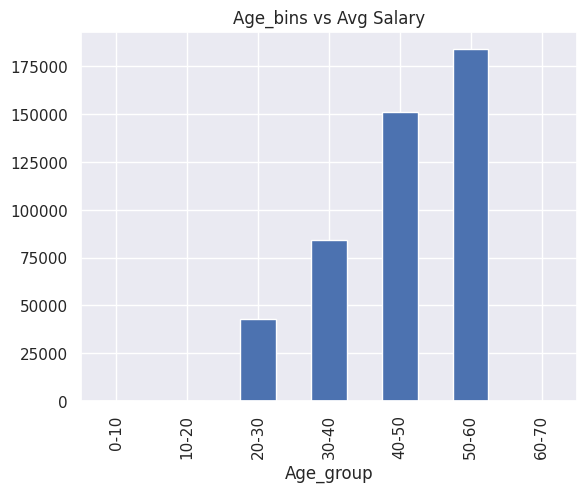

In [ ]:
Age_bin_cat.plot(kind='bar',title="Age_bins vs Avg Salary")


In [ ]:
# #multi variate data analysis
insured.groupby(['Gender','Education Level']).Salary.mean()

Gender  Education Level
Female  Bachelor's          71019.417476
        Master's           120200.000000
        PhD                155384.615385
Male    Bachelor's          77936.776860
        Master's           139791.666667
        PhD                160400.000000
Name: Salary, dtype: float64

In [ ]:
import plotly.express as px
fig = px.bar(insured, x="Gender", y="Salary",
             color='Education Level', barmode='group',
             height=400)
fig.show()

In [ ]:
# insured['Education Level'].value_counts()
df = insured['Education Level'].value_counts()
df

,count
Education Level,
Bachelor's,224
Master's,98
PhD,51


In [ ]:

import plotly.express as px
fig = px.pie(insured, values='Salary', names='Education Level', title='Population of European continent')
fig.show()

In [ ]:
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean().unstack()

Exp_group                        0-5           5-10          10-15  \
Gender Education Level                                               
Female Bachelor's       47040.816327   88225.806452   92941.176471   
       Master's         58750.000000   93000.000000  115000.000000   
       PhD                       NaN            NaN  147727.272727   
Male   Bachelor's       49158.474576   90833.333333  125384.615385   
       Master's         75000.000000  102941.176471  126250.000000   
       PhD                       NaN  110000.000000  126250.000000   

Exp_group                       15-20  
Gender Education Level                 
Female Bachelor's       120000.000000  
       Master's         170000.000000  
       PhD              153636.363636  
Male   Bachelor's       121875.000000  
       Master's         172750.000000  
       PhD              164333.333333

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Gender,Education Level'>

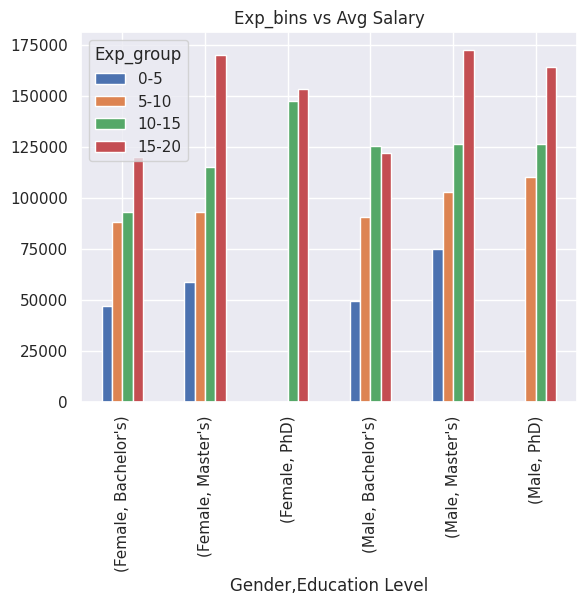

In [ ]:
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Gender,Education Level,Exp_group'>

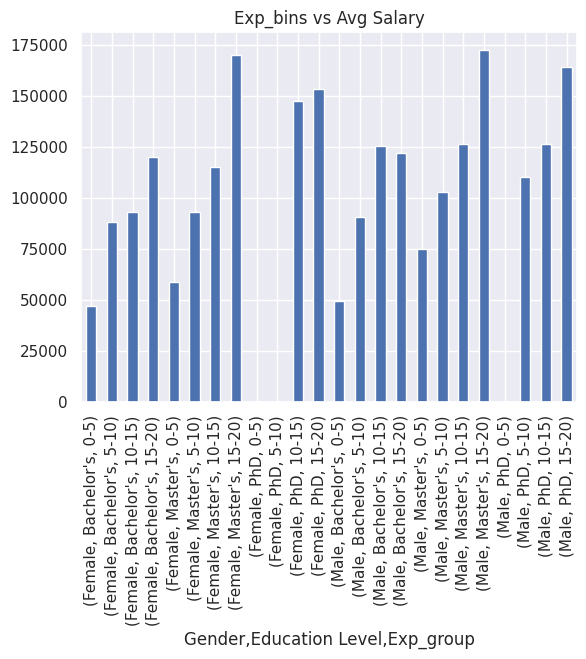

In [ ]:
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean().plot(kind='bar',title="Exp_bins vs Avg Salary")

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Education Level,Gender'>

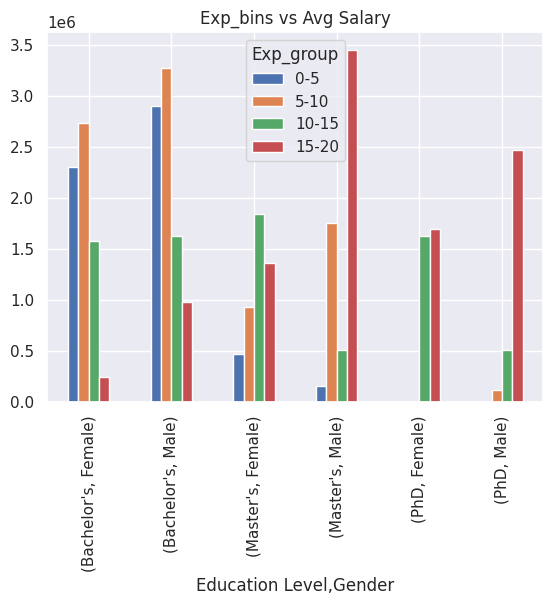

In [ ]:
insured.groupby(['Education Level','Gender','Exp_group']).Salary.sum().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

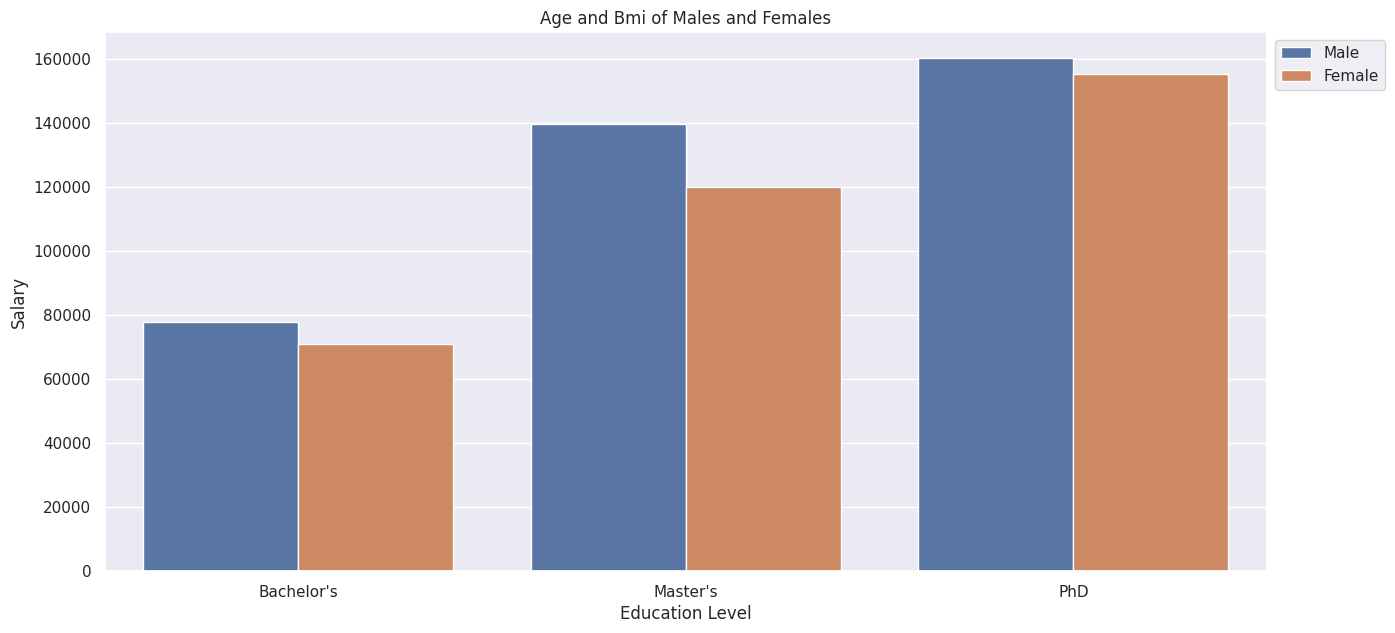

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["Education Level"],y=insured["Salary"],hue=insured['Gender'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Education level vs Experience vs Gender')]

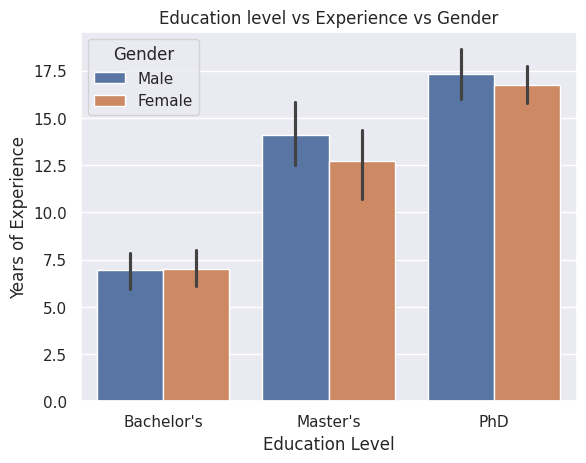

In [ ]:
sns.barplot(x='Education Level',y='Years of Experience',hue='Gender',data=insured).set(title="Education level vs Experience vs Gender" )

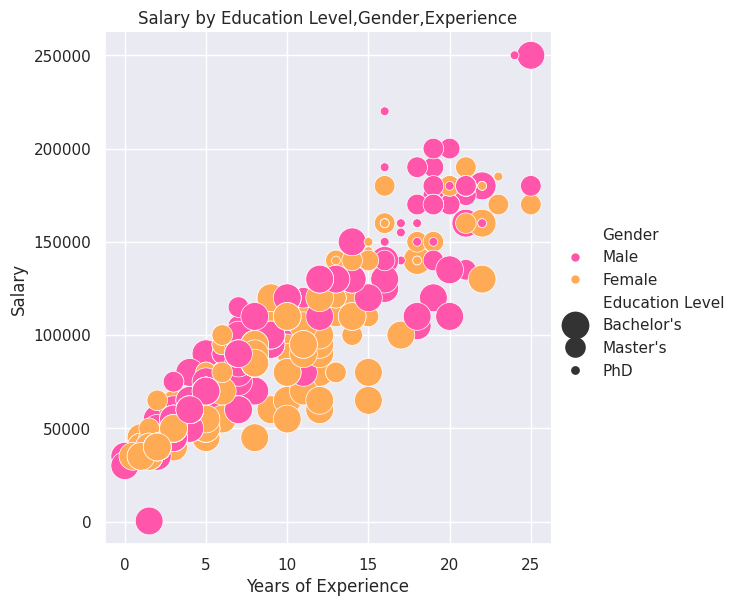

In [ ]:
sns.relplot(x=insured['Years of Experience'], y=insured["Salary"], hue=insured['Gender'], size=  insured['Education Level'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

In [ ]:
insured

,Age,AgeGroup,Gender,Education Level,Job Title,Years of Experience,Age_group,Exp_group,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,30-40,0-5,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,20-30,0-5,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,40-50,10-15,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,30-40,5-10,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,50-60,15-20,200000.0
...,...,...,...,...,...,...,...,...,...
370,35.0,30-35,Female,Bachelor's,Senior Marketing Analyst,8.0,30-40,5-10,85000.0
371,43.0,40-45,Male,Master's,Director of Operations,19.0,40-50,15-20,170000.0
372,29.0,25-30,Female,Bachelor's,Junior Project Manager,2.0,20-30,0-5,40000.0
373,34.0,30-35,Male,Bachelor's,Senior Operations Coordinator,7.0,30-40,5-10,90000.0


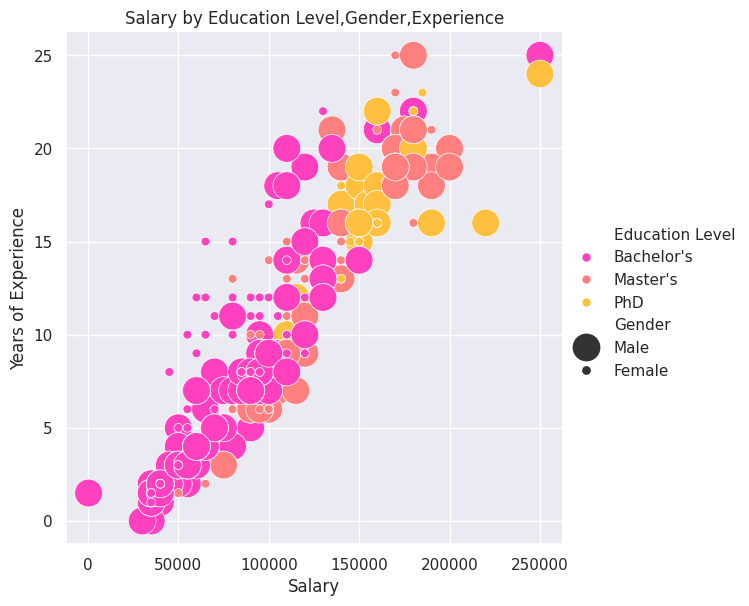

In [ ]:
sns.relplot(x=insured['Salary'], y=insured['Years of Experience'], hue=insured['Education Level'], size=  insured['Gender'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

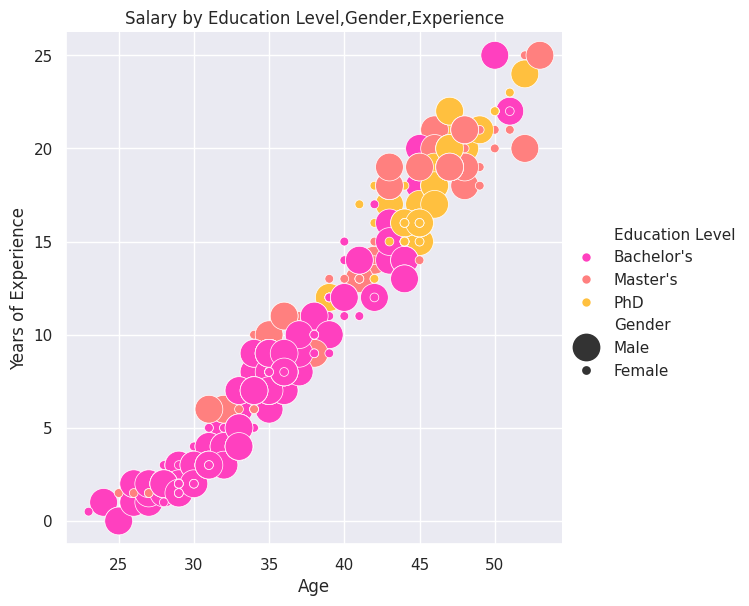

In [ ]:
sns.relplot(x=insured['Age'], y=insured['Years of Experience'], hue=insured['Education Level'], size=  insured['Gender'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
import pandas as pd
insured = pd.read_csv('/content/insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance.csv'

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

In [ ]:
len(smoker)

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

In [ ]:
len(nonsmoker)

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [ ]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


In [ ]:
# #smoker vs charges
# sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
# charges_no

In [ ]:
stats.ttest_ind(charges_yes, charges_no)

In [ ]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


In [ ]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

In [ ]:
df_male.bmi.mean()

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    # print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    # print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
